In [ ]:
#Step1: Import the Housing data

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split





housing = pd.read_csv('housing.csv')

housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
#Step2: Check for the missing data in the Dataframe
housing.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
#step4:Split the data in training and test set

# below i have used StratifiedShuffleSplit to split the data.
# for the Assignment i am goi g to used this split mechanisum as it is best in case of MultipleSplits and Cross Validation is in picture.

housing['income_group'] = pd.cut(housing['median_income'],bins= [0.,1.5,3,4.5,6,np.inf], labels= [1,2,3,4,5])
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_group"]): strat_train_set = housing.loc[train_index]
strat_test_set = housing.loc[test_index]

In [ ]:
housing = strat_train_set.drop(["median_house_value",'income_group'], axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

#Creating the pipline for the ML

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

housing_num = housing.drop("ocean_proximity", axis=1)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
         ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14,6665,1231.0,2026,1001,5.0900
12661,-121.42,38.51,15,7901,1422.0,4769,1418,2.8139
19263,-122.72,38.44,48,707,166.0,458,172,3.1797
19140,-122.70,38.31,14,3155,580.0,1208,501,4.1964


In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

np.float64(111802.67909771342)

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


def display_scores(scores):
    print("Scores:", scores)
    print("RMSE:", scores.mean())
    print("Standard deviation:", scores.std())



lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [72229.03469752 65318.2240289  67706.39604745 69368.53738998
 66767.61061621 73003.75273869 70522.24414582 69440.77896541
 66930.32945876 70756.31946074]
RMSE: 69204.32275494763
Standard deviation: 2372.070791055922


In [ ]:
from sklearn.tree import DecisionTreeRegressor

param_grid_tree = {
    'max_depth': list(range(1, 20)),
    'min_samples_leaf': list(range(1, 20))
}

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)


scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)


Scores: [71177.6601991  69770.07865373 64770.5639395  68536.60203993
 67057.08155801 68847.12456973 70977.38255647 69208.86346929
 67187.87131535 73280.38732407]
RMSE: 69081.361562518
Standard deviation: 2296.288087393378


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)


scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                          scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)


Scores: [71177.6601991  69770.07865373 64770.5639395  68536.60203993
 67057.08155801 68847.12456973 70977.38255647 69208.86346929
 67187.87131535 73280.38732407]
RMSE: 69081.361562518
Standard deviation: 2296.288087393378


In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]


forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)


forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


Scores: [51039.08053738 48741.94041426 45940.42771745 50501.41453432
 47387.7896427  49595.25845731 51625.68567717 48865.70709952
 47322.87631489 53301.08748462]
RMSE: 49432.12678796127
Standard deviation: 2124.8587921578355


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [
         {'kernel': ['linear'], 'C': [100, 300, 1000, 3000, 5000]},
         {'kernel': ['rbf'], 'C': [100, 300, 1000, 3000, 5000],
          'gamma': [0.3, 1.0, 3.0, 10, 30]},
     ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END ...............................C=100, kernel=linear; total time=  10.4s
[CV] END ...............................C=100, kernel=linear; total time=  18.4s
[CV] END ...............................C=100, kernel=linear; total time=  12.7s
[CV] END ...............................C=300, kernel=linear; total time=   9.4s
[CV] END ...............................C=300, kernel=linear; total time=  11.5s
[CV] END ...............................C=300, kernel=linear; total time=  11.8s
[CV] END ..............................C=1000, kernel=linear; total time=  11.9s
[CV] END ..............................C=1000, kernel=linear; total time=   8.3s
[CV] END ..............................C=1000, kernel=linear; total time=   7.5s
[CV] END ..............................C=3000, kernel=linear; total time=   9.0s
[CV] END ..............................C=3000, kernel=linear; total time=   9.1s
[CV] END ..............................C=3000, k

GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': [100, 300, 1000, 3000, 5000],
                          'kernel': ['linear']},
                         {'C': [100, 300, 1000, 3000, 5000],
                          'gamma': [0.3, 1.0, 3.0, 10, 30],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [52]:

negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

np.float64(65495.30119430491)

In [53]:
grid_search.best_params_

{'C': 5000, 'gamma': 0.3, 'kernel': 'rbf'}

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


svm_reg_rbf = SVR(kernel="rbf", C=5000)
svm_reg_rbf.fit(housing_prepared, housing_labels)

svm_rbf_scores = cross_val_score(svm_reg_rbf, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svm_rbf_rmse_scores = np.sqrt(-svm_rbf_scores)
display_scores(svm_rbf_rmse_scores)


Scores: [65631.10829286 60638.95892793 57832.98260855 64870.4434137
 59574.88516553 65736.18690622 65573.41214906 62628.23263111
 61701.99368265 64346.41780128]
RMSE: 62853.46215788871
Standard deviation: 2682.453959801877


In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR


param_grid = {
    'kernel': ['linear','rbf'],
    'C': [7000, 10000, 20000, 30000, 40000],
    'gamma': [0.1, 0.3, 1.0, 3.0 ],
}

svm_reg_rsv = SVR()
rsv_search = RandomizedSearchCV(svm_reg_rsv, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
rsv_search.fit(housing_prepared, housing_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....................C=20000, gamma=0.1, kernel=rbf; total time=  11.3s
[CV] END .....................C=20000, gamma=0.1, kernel=rbf; total time=  10.6s
[CV] END .....................C=20000, gamma=0.1, kernel=rbf; total time=  11.5s
[CV] END ...................C=7000, gamma=0.3, kernel=linear; total time=   9.5s
[CV] END ...................C=7000, gamma=0.3, kernel=linear; total time=   9.2s
[CV] END ...................C=7000, gamma=0.3, kernel=linear; total time=   8.3s
[CV] END .....................C=10000, gamma=0.3, kernel=rbf; total time=  11.4s
[CV] END .....................C=10000, gamma=0.3, kernel=rbf; total time=  11.5s
[CV] END .....................C=10000, gamma=0.3, kernel=rbf; total time=  11.5s
[CV] END ..................C=30000, gamma=0.1, kernel=linear; total time=  11.9s
[CV] END ..................C=30000, gamma=0.1, kernel=linear; total time=  11.6s
[CV] END ..................C=30000, gamma=0.1, k

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': [7000, 10000, 20000, 30000, 40000],
                                        'gamma': [0.1, 0.3, 1.0, 3.0],
                                        'kernel': ['linear', 'rbf']},
                   scoring='neg_mean_squared_error', verbose=2)

In [56]:
negative_mse = rsv_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

np.float64(60407.14710818342)

In [57]:
rsv_search.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 20000}

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


svm_reg_rsv = SVR(kernel="rbf", C=20000)
svm_reg_rsv.fit(housing_prepared, housing_labels)

svm_reg_rsv_scores = cross_val_score(svm_reg_rsv, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svm_reg_rsv_rmse_scores = np.sqrt(-svm_reg_rsv_scores)
display_scores(svm_reg_rsv_rmse_scores)

Scores: [62479.45208607 57258.40687549 54526.16352036 61295.51741079
 55886.60494969 62199.50331987 61844.41646336 59119.85950822
 58022.5189943  61616.25138282]
RMSE: 59424.869451096245
Standard deviation: 2728.6364345987063


/tmp/ipython-input-3923245309.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_values, palette='viridis')


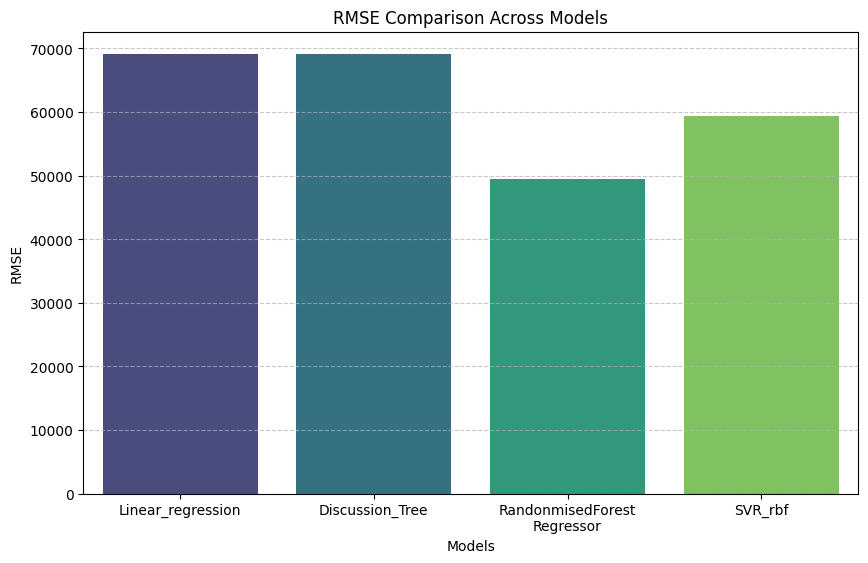

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data: model names and their RMSE values
models = ['Linear_regression', 'Discussion_Tree', 'RandonmisedForest\nRegressor', 'SVR_rbf']
#rmse_values = [lin_rmse_scores, tree_rmse_scores, forest_rmse_scores, svm_reg_rsv_rmse_scores]
rmse_values = [
    np.mean(lin_rmse_scores),
    np.mean(tree_rmse_scores),
    np.mean(forest_rmse_scores),
    np.mean(svm_reg_rsv_rmse_scores)
]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse_values, palette='viridis')

plt.title('RMSE Comparison Across Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
#plt.ylim(0, max(rmse_values) + 1)  # add some space on y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()